In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(rd.randrange(10, 1000), size=5)

In [5]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,871,848,864,913,872,30,35,24,26,27
gene2,57,54,64,79,46,528,557,539,502,470
gene3,329,298,336,321,315,55,56,71,64,66
gene4,474,462,462,403,425,585,623,577,608,599
gene5,771,794,715,753,751,259,288,273,251,281


In [6]:
data.shape

(100, 10)

In [11]:
scaled_data = preprocessing.scale(data.T)
scaled_data

array([[ 0.99318538, -1.00807529,  1.06816165, -0.59940615,  1.05454755,
         0.94107633, -1.03674072, -0.58559615,  0.92706121,  1.03777895,
         0.55865029, -0.78521841, -1.08239083, -1.04371864, -1.00649073,
         1.06542097,  1.32342966, -1.05797636,  0.95568535, -0.97161543,
         1.18608895, -1.01590442, -0.82067831, -0.99773093, -0.99695554,
        -0.97914915,  1.09830184,  1.05368325,  1.01922169, -0.94930373,
        -0.91065475,  0.98212071,  0.88692246, -0.88658487, -1.49093076,
         1.16524696,  0.75888165,  0.59264591, -1.02775357,  1.07797991,
         1.12642635, -1.04483961,  2.46941261,  1.05115938,  1.16628355,
        -0.93685405, -1.05534926,  1.09498926, -0.664147  , -1.21496115,
         0.92913696,  1.017367  ,  0.90231365, -1.26378174, -1.00948131,
        -1.01515731,  0.81493571, -0.93328695, -1.11634981, -0.94077542,
         1.11481003,  0.85854316,  1.03553942, -0.94200331, -0.95994617,
        -0.9138066 ,  0.57682003,  0.81814408, -1.0

In [12]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [13]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([92.9,  1.9,  1.3,  1.1,  0.9,  0.6,  0.5,  0.4,  0.3,  0. ])

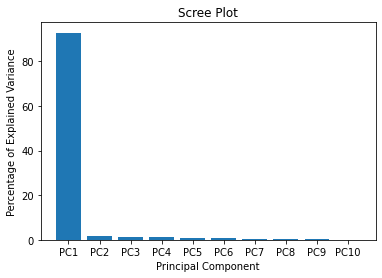

In [16]:
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

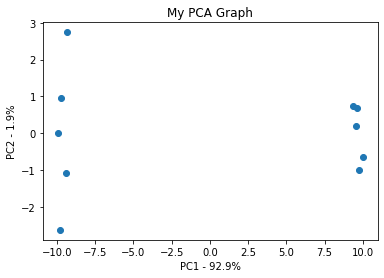

In [20]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC1.loc[sample]))

plt.show()

In [21]:
loading_score = pd.Series(pca.components_[0], index=genes)
sorted_loading_score = loading_score.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_score[0:10].index.values
print(loading_score[top_10_genes])

gene63    0.103663
gene89    0.103634
gene42   -0.103628
gene1     0.103624
gene61    0.103607
gene65   -0.103600
gene24   -0.103593
gene26   -0.103589
gene82    0.103587
gene10    0.103583
dtype: float64
